In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D 
sns.set(style="whitegrid")
pd.set_option("display.max_columns" , None)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BathSoapHousehold.csv')

In [3]:
df.head()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,"Br. Cd. 57, 144",Br. Cd. 55,Br. Cd. 272,Br. Cd. 286,Br. Cd. 24,Br. Cd. 481,Br. Cd. 352,Br. Cd. 5,Others 999,Pr Cat 1,Pr Cat 2,Pr Cat 3,Pr Cat 4,PropCat 5,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010,4,3,10,1,4,4,2,4,1,2,3,17,8025,24,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564
1,1010020,3,2,10,2,2,4,4,2,1,19,5,25,13975,40,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000
2,1014020,2,3,10,2,4,5,6,4,1,23,5,37,23100,63,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247
3,1014030,4,0,0,0,4,0,0,5,0,0,2,4,1500,4,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000
4,1014190,4,1,10,2,3,4,4,3,1,10,3,6,8300,13,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000


In [4]:
# fixing column names, removing special characters and spaces
df.columns= df.columns.str.replace('.','')
df.columns= df.columns.str.replace('/','')
df.columns= df.columns.str.replace('-','')
df.columns= df.columns.str.replace(',','')
df.columns = df.columns.str.replace(' ', '_')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Member_id              600 non-null    int64  
 1   SEC                    600 non-null    int64  
 2   FEH                    600 non-null    int64  
 3   MT                     600 non-null    int64  
 4   SEX                    600 non-null    int64  
 5   AGE                    600 non-null    int64  
 6   EDU                    600 non-null    int64  
 7   HS                     600 non-null    int64  
 8   CHILD                  600 non-null    int64  
 9   CS                     600 non-null    int64  
 10  Affluence_Index        600 non-null    int64  
 11  No_of_Brands           600 non-null    int64  
 12  Brand_Runs             600 non-null    int64  
 13  Total_Volume           600 non-null    int64  
 14  No_of__Trans           600 non-null    int64  
 15  Value 

In [6]:
#variables groups
demographics=['SEC' ,  'FEH' ,   'MT'  ,   'SEX'  , 'AGE'  ,   'EDU' ,
              'HS'  ,  'CHILD'   , 'CS'   , 'Affluence_Index']
purchase_indicator=['No_of_Brands', 'Brand_Runs', 'Total_Volume' ,'No_of__Trans', 
                    'Value', 'Trans__Brand_Runs', 'VolTran', 'Avg_Price_' ,'Pur_Vol_No_Promo__%',
                  'Pur_Vol_Promo_6_%','Pur_Vol_Other_Promo_%' ]
brands_indicator =['Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286',   'Br_Cd_24' , 
                   'Br_Cd_481' , 'Br_Cd_352'  , 'Br_Cd_5' ,'Others_999'  ]

price_category_indicator= ['Pr_Cat_1' ,'Pr_Cat_2' , 'Pr_Cat_3','Pr_Cat_4'  ]

selling_proposition_indicator= [ 'PropCat_5' , 'PropCat_6', 'PropCat_7' ,
                                'PropCat_8' , 'PropCat_9'  , 'PropCat_10' ,
                                'PropCat_11' ,'PropCat_12' , 'PropCat_13' ,'PropCat_14' ,  'PropCat_15'  ]

In [7]:
# check number of unique values in demographic features
df[demographics].astype('object').describe(include='all').loc['unique', :]

SEC                 4
FEH                 4
MT                 15
SEX                 3
AGE                 4
EDU                10
HS                 13
CHILD               5
CS                  3
Affluence_Index    53
Name: unique, dtype: int64

In [8]:
# maximumabrand purchase other than "others_999"
df['maxBrPurchase'] = df[['Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286',   'Br_Cd_24' , 
                   'Br_Cd_481' , 'Br_Cd_352'  , 'Br_Cd_5']].max(axis = 1)

#identify which brand has maximum purchase
df['maxBrand']=df[['Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286',   'Br_Cd_24' , 
                   'Br_Cd_481' , 'Br_Cd_352'  , 'Br_Cd_5']].idxmax(axis=1)

In [9]:
df[['Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286',   'Br_Cd_24' , 
                   'Br_Cd_481' , 'Br_Cd_352'  , 'Br_Cd_5','maxBrPurchase']].head()

,Br_Cd_57_144,Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,maxBrPurchase
0,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.376947
1,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.144902
2,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.545455
3,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.600000
4,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.144578


In [10]:
#maximum price category purchase

# maximum brand purchase other than "others_999"
df['maxPrCatPurchase'] = df[price_category_indicator].max(axis = 1)

#identify which brand has maximum purchase
df['maxPriceCat']=df[price_category_indicator].idxmax(axis=1)

In [11]:
#maximum proposition purchase

# maximum brand purchase other than "others_999"
df['maxPropPurchase'] = df[selling_proposition_indicator].max(axis = 1)

#identify which brand has maximum purchase
df['maxPropCat']=df[selling_proposition_indicator].idxmax(axis=1)

In [12]:
df

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Br_Cd_57_144,Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,maxBrPurchase,maxBrand,maxPrCatPurchase,maxPriceCat,maxPropPurchase,maxPropCat
0,1010010,4,3,10,1,4,4,2,4,1,2,3,17,8025,24,818.00,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564,0.376947,Br_Cd_57_144,0.560748,Pr_Cat_2,0.501558,PropCat_5
1,1010020,3,2,10,2,2,4,4,2,1,19,5,25,13975,40,1681.50,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.000000,0.000000,0.000000,0.059034,0.0,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000,0.144902,Br_Cd_5,0.547406,Pr_Cat_2,0.456172,PropCat_5
2,1014020,2,3,10,2,4,5,6,4,1,23,5,37,23100,63,1950.00,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.000000,0.030303,0.000000,0.000000,0.0,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247,0.545455,Br_Cd_55,0.561688,Pr_Cat_3,0.561688,PropCat_14
3,1014030,4,0,0,0,4,0,0,5,0,0,2,4,1500,4,114.00,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000,0.600000,Br_Cd_55,0.600000,Pr_Cat_3,0.600000,PropCat_14
4,1014190,4,1,10,2,3,4,4,3,1,10,3,6,8300,13,591.00,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000,0.144578,Br_Cd_55,0.807229,Pr_Cat_4,0.807229,PropCat_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1167090,2,3,10,2,4,5,5,4,1,15,3,5,9025,22,1218.00,4.40,410.23,13.50,0.775623,0.224377,0.000000,0.044321,0.000000,0.000000,0.000000,0.000000,0.897507,0.0,0.000000,0.058172,0.058172,0.941828,0.000000,0.000000,0.077562,0.000000,0.000000,0.000000,0.000000,0.024931,0.897507,0.000000,0.000000,0.000000,0.000000,0.897507,Br_Cd_481,0.941828,Pr_Cat_2,0.897507,PropCat_11
596,1167230,3,3,10,2,3,5,4,4,1,29,5,23,5050,28,851.00,1.22,180.36,16.85,0.925743,0.074257,0.000000,0.000000,0.000000,0.089109,0.039604,0.089109,0.000000,0.0,0.103960,0.678218,0.534653,0.366337,0.000000,0.099010,0.168317,0.430693,0.074257,0.148515,0.000000,0.039604,0.000000,0.000000,0.089109,0.000000,0.049505,0.103960,Br_Cd_5,0.534653,Pr_Cat_1,0.430693,PropCat_6
597,1167340,3,3,17,2,4,4,9,4,1,13,4,19,29100,25,3302.75,1.32,1164.00,11.35,1.000000,0.000000,0.000000,0.246564,0.180412,0.015464,0.000000,0.000000,0.000000,0.0,0.000000,0.557560,0.170103,0.649485,0.180412,0.000000,0.622852,0.127148,0.000000,0.030928,0.000000,0.038660,0.000000,0.000000,0.000000,0.180412,0.000000,0.246564,Br_Cd_57_144,0.649485,Pr_Cat_2,0.622852,PropCat_5
598,1167350,2,1,4,2,4,5,2,4,2,20,3,15,5500,19,460.00,1.27,289.47,8.36,0.759091,0.186364,0.054545,0.000000,0.109091,0.000000,0.000000,0.027273,0.000000,0.0,0.000000,0.863636,0.136364,0.509091,0.209091,0.145455,0.690909,0.145455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027273,0.136364,0.000000,0.109091,Br_Cd_55,0.509091

In [13]:
dummy_df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
dummy_df.head()

,Member_id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Br_Cd_57_144,Br_Cd_55,Br_Cd_272,Br_Cd_286,Br_Cd_24,Br_Cd_481,Br_Cd_352,Br_Cd_5,Others_999,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,maxBrPurchase,maxPrCatPurchase,maxPropPurchase,maxBrand_Br_Cd_272,maxBrand_Br_Cd_286,maxBrand_Br_Cd_352,maxBrand_Br_Cd_481,maxBrand_Br_Cd_5,maxBrand_Br_Cd_55,maxBrand_Br_Cd_57_144,maxPriceCat_Pr_Cat_2,maxPriceCat_Pr_Cat_3,maxPriceCat_Pr_Cat_4,maxPropCat_PropCat_11,maxPropCat_PropCat_12,maxPropCat_PropCat_13,maxPropCat_PropCat_14,maxPropCat_PropCat_15,maxPropCat_PropCat_5,maxPropCat_PropCat_6,maxPropCat_PropCat_7,maxPropCat_PropCat_8
0,1010010,4,3,10,1,4,4,2,4,1,2,3,17,8025,24,818.0,1.41,334.38,10.19,1.000000,0.000000,0.000000,0.376947,0.130841,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.492212,0.233645,0.560748,0.130841,0.074766,0.501558,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.376947,0.560748,0.501558,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,1010020,3,2,10,2,2,4,4,2,1,19,5,25,13975,40,1681.5,1.60,349.38,12.03,0.887299,0.096601,0.016100,0.021467,0.075134,0.0,0.000000,0.0,0.059034,0.0,0.144902,0.699463,0.293381,0.547406,0.094812,0.064401,0.456172,0.347048,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.144902,0.547406,0.456172,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,1014020,2,3,10,2,4,5,6,4,1,23,5,37,23100,63,1950.0,1.70,366.67,8.44,0.941558,0.019481,0.038961,0.025974,0.545455,0.0,0.030303,0.0,0.000000,0.0,0.019481,0.378788,0.120130,0.318182,0.561688,0.000000,0.244589,0.121212,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.545455,0.561688,0.561688,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1014030,4,0,0,0,4,0,0,5,0,0,2,4,1500,4,114.0,1.00,375.00,7.60,1.000000,0.000000,0.000000,0.400000,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.400000,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.600000,0.600000,0.600000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1014190,4,1,10,2,3,4,4,3,1,10,3,6,8300,13,591.0,2.17,638.46,7.12,0.614458,0.144578,0.240964,0.048193,0.144578,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.807229,0.000000,0.048193,0.144578,0.807229,0.807229,0.000000,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.144578,0.807229,0.807229,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [14]:
non_demographic_df= df[[col for col in df.columns if col not in demographics]]

In [15]:
purchase_behaviour = ['No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of__Trans', 'Value', 'Trans__Brand_Runs', 'VolTran', 'Avg_Price_','maxBrPurchase','Others_999' ]

In [16]:
purchase_behavior_df=non_demographic_df[purchase_behaviour]

In [17]:
purchase_behavior_df.head()

,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,3,17,8025,24,818.0,1.41,334.38,10.19,0.376947,0.492212
1,5,25,13975,40,1681.5,1.60,349.38,12.03,0.144902,0.699463
2,5,37,23100,63,1950.0,1.70,366.67,8.44,0.545455,0.378788
3,2,4,1500,4,114.0,1.00,375.00,7.60,0.600000,0.000000
4,3,6,8300,13,591.0,2.17,638.46,7.12,0.144578,0.807229


In [18]:
scaler = StandardScaler()
purchase_behavior_df=pd.DataFrame(scaler.fit_transform(purchase_behavior_df), columns=purchase_behavior_df.columns);


In [19]:
purchase_behavior_df.head()

,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,-0.403364,0.120173,-0.501007,-0.410811,-0.588594,-0.464084,-0.324562,-0.439810,0.020107,-0.100244
1,0.863748,0.890306,0.265360,0.508057,0.389966,-0.391077,-0.264213,0.052220,-0.793987,0.597393
2,0.863748,2.045506,1.440672,1.828930,0.694243,-0.352653,-0.194651,-0.907774,0.611288,-0.482045
3,-1.036920,-1.131294,-1.341436,-1.559396,-1.386401,-0.621624,-0.161137,-1.132397,0.802652,-1.757097
4,-0.403364,-0.938760,-0.465587,-1.042532,-0.845841,-0.172058,0.898835,-1.260753,-0.795121,0.960147


# For Purchase Behaviour
## KMeans with K=2

In [20]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans=kmeans.fit(purchase_behavior_df)


In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_,columns=purchase_behavior_df.columns)


In [22]:
pd.set_option('precision', 3)
centroids

,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,-0.542,-0.709,-0.177,-0.585,-0.344,0.293,0.320,-0.314,0.659,-0.548
1,0.484,0.633,0.158,0.523,0.307,-0.262,-0.286,0.280,-0.589,0.489


In [23]:
distances = kmeans.transform(purchase_behavior_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=purchase_behavior_df.index)

In [24]:
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (283 members): 2564.58 within cluster 
Cluster 1 (317 members): 2197.38 within cluster 


In [25]:
### Euclidean Distance between Centroids

In [26]:
pd.DataFrame(pairwise.pairwise_distances(kmeans.cluster_centers_,
metric='euclidean'))

,0,1
0,0.000,2.878
1,2.878,0.000


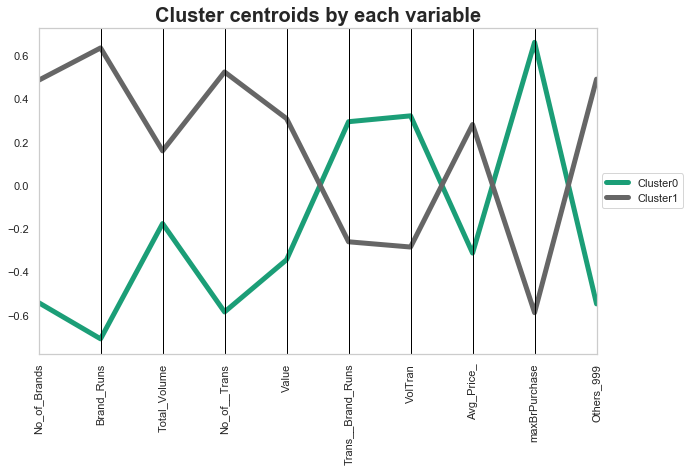

In [27]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 characterized by less no of brands, but high % of Brand purchase, and low % of other brands. (Brand loyal segment).

Cluster 1 characterized by high total volume  by others brands (not brand loyal segment)

Max % of brand purchase and No of Brands does good job at segmenting these households

### Demographic charateristics of each cluster

In [28]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()

In [29]:
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,2.686,1.852,7.346,1.562,3.120,3.346,3.820,3.449,0.841,12.784
1,2.334,2.224,8.921,1.896,3.297,4.666,4.524,3.041,1.013,20.801


cluster 0 (brand loyal) are mostly with moderately lower socioeconomic class, and average lower education level, with lower Affluence index. 

cluster 1 (non brand loyal) with moderately higher socioeconomic class, and higher education level, with high Affluence index




## KMeans with K=3

In [30]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans=kmeans.fit(purchase_behavior_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=purchase_behavior_df.columns)
centroids

,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,0.952,1.100,0.637,1.083,0.768,-0.255,-0.190,0.127,-0.478,0.255
1,-0.276,-0.216,-0.533,-0.416,-0.455,-0.248,-0.274,0.229,-0.533,0.600
2,-0.494,-0.724,0.185,-0.412,-0.055,0.608,0.586,-0.459,1.241,-1.129


In [31]:
distances = kmeans.transform(purchase_behavior_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=purchase_behavior_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (166 members): 1143.68 within cluster 
Cluster 1 (259 members): 1244.80 within cluster 
Cluster 2 (175 members): 1587.79 within cluster 


__Cluster 1 has higher proportion of sample, while cluster 0 and cluster 2 are approximately equal__ 

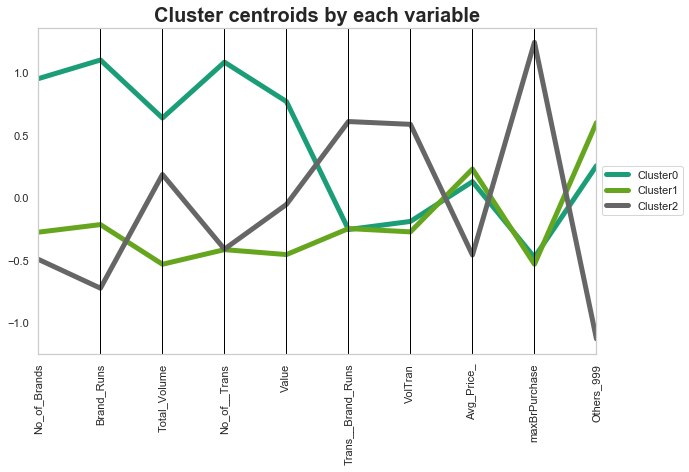

In [32]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 represent high no of brands purchases with more transaction, but slightly high purchases for other brands. These must be moderately (not very) loyal customers. 

Cluster 1 represents non loyal customers, with high other brand purchases, with avg purchase price higher than rest of the clusters.

Cluster 2 represents brand loyal customers, with average purchase price lower(can be a promotion impact, will have to inspect with basis of purchase variables), and volume of transactions being higher, with lower no of brands purchased lower. 


### Demographic charateristics of each cluster

In [33]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()

In [34]:
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,2.410,2.361,9.241,1.922,3.349,4.602,5.108,2.964,1.030,20.994
1,2.340,1.849,7.699,1.645,3.131,4.039,3.475,3.313,0.892,16.606
2,2.823,2.046,7.880,1.703,3.206,3.520,4.383,3.371,0.897,13.863


Cluster 0 represents majority non vegetarian women, with moderately high education level, and average 5 household members.

Cluster 2 represents majority lower socioeconomic class with lower education level


## KMeans with K=4

In [35]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans=kmeans.fit(purchase_behavior_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=purchase_behavior_df.columns)
centroids

,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,-0.429,-0.728,-0.211,-0.493,-0.378,0.518,0.189,-0.378,1.234,-1.149e+00
1,0.964,1.035,0.176,0.899,0.310,-0.294,-0.474,0.180,-0.481,2.480e-01
2,-0.543,-0.358,-0.530,-0.508,-0.456,-0.205,-0.198,0.247,-0.677,8.075e-01
3,-0.080,0.005,2.331,0.297,2.108,0.091,2.094,-0.337,0.096,-1.552e-04


In [36]:
distances = kmeans.transform(purchase_behavior_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=purchase_behavior_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (175 members): 1172.77 within cluster 
Cluster 1 (189 members): 884.79 within cluster 
Cluster 2 (191 members): 881.22 within cluster 
Cluster 3 (45 members): 494.97 within cluster 


__Cluster 1,2,and 3 have approximately equal number of samples while cluster 3 is very small__
Cluster 0 has high with in the cluster squared error

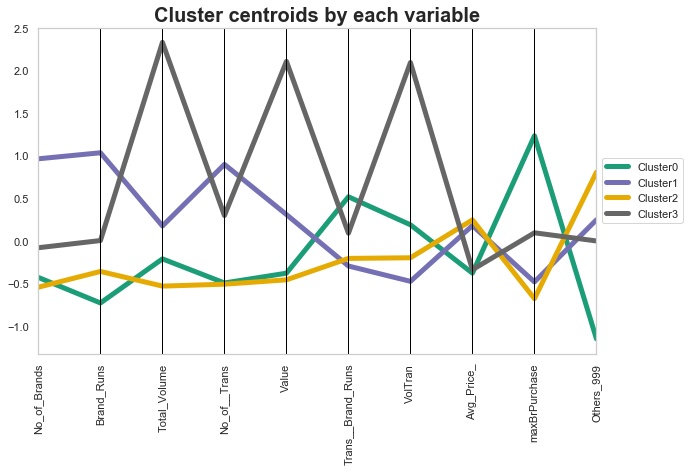

In [37]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 characterizes brand loyal customers, with high transaction per brand.

Cluster 1  and Cluster 2 represents not  brand loyal customers, with cluster 2 being high brand runs (consecutive transactions) and high number of brands purchased.

Cluster 3 is fairly loyal customers, with less number of brands purchaed, but with high total volume

### Demographic charateristics of each cluster

In [38]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()

In [39]:
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,2.703,1.897,7.480,1.646,3.114,3.520,3.909,3.469,0.886,13.891
1,2.333,2.254,8.799,1.899,3.265,4.825,4.598,3.011,1.016,21.238
2,2.408,1.853,7.728,1.602,3.194,3.712,3.450,3.319,0.864,15.241
3,2.800,2.600,10.200,2.000,3.467,4.200,6.733,2.889,1.044,19.022


Cluster 0 characterizes lower socioeconomic class with majority vegetarian, who eats egg, and lower education level.

Cluster 3 represents lower socioeconomic class , with majority non vegetarian female, native language 10 , and average household member 6 or more. 

# For Basis of purchase


In [40]:
non_demographic_df.columns

Index(['Member_id', 'No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of__Trans', 'Value', 'Trans__Brand_Runs', 'VolTran', 'Avg_Price_',
       'Pur_Vol_No_Promo__%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%',
       'Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24',
       'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15', 'maxBrPurchase',
       'maxBrand', 'maxPrCatPurchase', 'maxPriceCat', 'maxPropPurchase',
       'maxPropCat'],
      dtype='object')

In [41]:
basis_of_purchase = ['Pur_Vol_No_Promo__%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%','Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15' ]

In [42]:
basis_of_purchase_df=non_demographic_df[basis_of_purchase]

In [43]:
basis_of_purchase_df.head()

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,1.000,0.000,0.000,0.234,0.561,0.131,0.075,0.502,0.000,0.000,0.000,0.000,0.0,0.000,0.028,0.0,0.131,0.340
1,0.887,0.097,0.016,0.293,0.547,0.095,0.064,0.456,0.347,0.027,0.016,0.014,0.0,0.059,0.000,0.0,0.081,0.000
2,0.942,0.019,0.039,0.120,0.318,0.562,0.000,0.245,0.121,0.034,0.011,0.009,0.0,0.000,0.016,0.0,0.562,0.003
3,1.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.600,0.000
4,0.614,0.145,0.241,0.000,0.048,0.145,0.807,0.807,0.000,0.000,0.048,0.000,0.0,0.000,0.000,0.0,0.145,0.000


In [44]:
scaler = StandardScaler()
basis_of_purchase_df=pd.DataFrame(scaler.fit_transform(basis_of_purchase_df), columns=basis_of_purchase_df.columns);


In [45]:
basis_of_purchase_df.head()

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.729,-0.576,-0.466,-0.162,0.217,-0.031,-0.072,0.140,-0.556,-0.495,-0.526,-0.491,-0.264,-0.298,0.830,-0.261,-0.021,3.590
1,-0.215,0.464,-0.242,0.051,0.174,-0.166,-0.126,-0.003,1.533,-0.358,-0.420,-0.263,-0.264,0.302,-0.236,-0.261,-0.211,-0.290
2,0.239,-0.366,0.076,-0.566,-0.562,1.578,-0.463,-0.673,0.174,-0.324,-0.455,-0.353,-0.264,-0.298,0.381,-0.261,1.600,-0.253
3,0.729,-0.576,-0.466,-0.994,-0.299,1.721,-0.463,-0.181,-0.556,-0.495,-0.526,-0.491,-0.264,-0.298,-0.236,-0.261,1.744,-0.290
4,-2.501,0.980,2.885,-0.994,-1.429,0.020,3.752,1.108,-0.556,-0.495,-0.210,-0.491,-0.264,-0.298,-0.236,-0.261,0.030,-0.290


### KMeans with K=2

In [46]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans=kmeans.fit(basis_of_purchase_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=basis_of_purchase_df.columns)
centroids

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.206,-0.405,0.181,-0.785,-1.125,2.371,-0.337,-1.099,-0.171,-0.443,-0.465,-0.167,-0.257,-0.229,-0.160,-0.232,2.375,-0.215
1,-0.031,0.061,-0.027,0.117,0.168,-0.354,0.050,0.164,0.026,0.066,0.069,0.025,0.038,0.034,0.024,0.035,-0.355,0.032


In [47]:
distances = kmeans.transform(basis_of_purchase_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=basis_of_purchase_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (78 members): 402.51 within cluster 
Cluster 1 (522 members): 9015.04 within cluster 


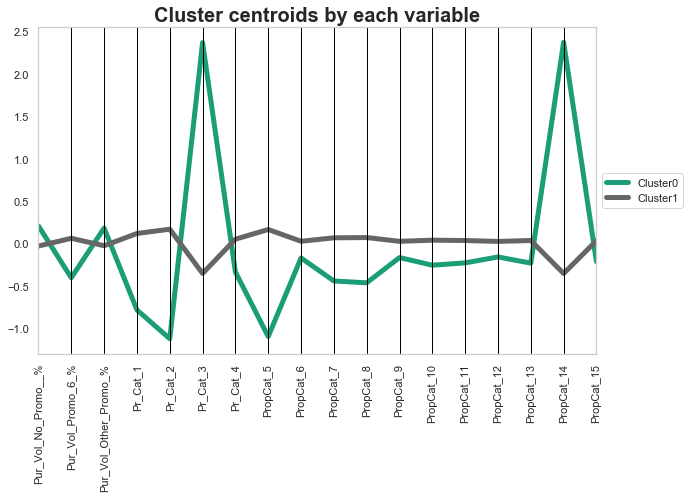

In [48]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 represents those who are not price conscious, and generally purchase more even if there is no promotion.

Cluster 1 characterizes those househlds which are price conscious, and purchases when there is promotion (6% or other)



In [49]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()

In [50]:
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,3.333,2.115,7.859,1.577,3.038,2.500,4.244,3.449,0.910,9.154
1,2.375,2.038,8.226,1.762,3.239,4.274,4.184,3.201,0.935,18.195


Cluster 0 represents lower socioeconomic class with low affluency and low education level.

Cluster 1 represents high socioeconomica class, with average to high education level

### KMeans with K=3

In [51]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans=kmeans.fit(basis_of_purchase_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=basis_of_purchase_df.columns)
centroids

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.310,-0.252,-0.189,-0.457,0.559,-0.289,0.165,0.458,-0.001,-0.035,-0.210,-0.032,-0.158,0.068,-0.105,-0.203,-0.292,0.015
1,0.186,-0.384,0.188,-0.785,-1.136,2.372,-0.321,-1.092,-0.171,-0.449,-0.462,-0.167,-0.257,-0.229,-0.160,-0.232,2.374,-0.230
2,-0.589,0.572,0.239,1.073,-0.478,-0.463,-0.147,-0.328,0.070,0.237,0.533,0.119,0.365,-0.021,0.238,0.429,-0.460,0.066


In [52]:
distances = kmeans.transform(basis_of_purchase_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=basis_of_purchase_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (326 members): 3463.56 within cluster 
Cluster 1 (78 members): 404.81 within cluster 
Cluster 2 (196 members): 4655.29 within cluster 


Cluster 1 has lower number of samples, with low within the cluster squared error. While for Cluster 0 and 2, the error is very high

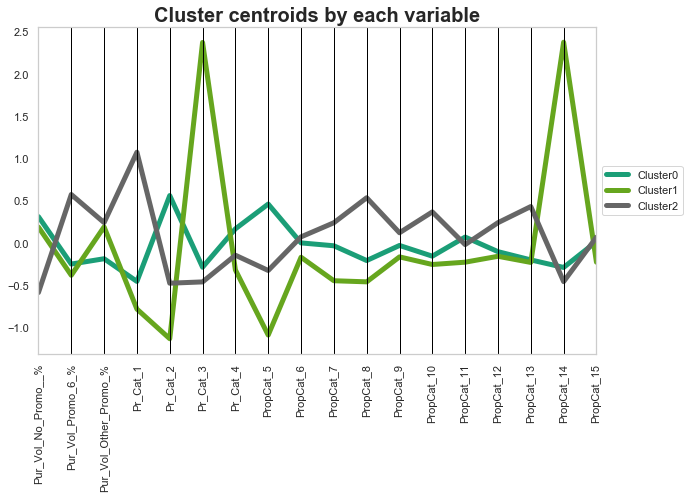

In [53]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 are not price conscious, they purchases even if there is no promotion, price category 2, and proposition category 5. 

Cluster 1 represents those who purchases with other promotion offer, from price category 3, and proposition category 14

Cluster 2 represent price conscious customer, they purchase with promotion, and proposition category 8.


### KMeans with K=4

In [54]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans=kmeans.fit(basis_of_purchase_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=basis_of_purchase_df.columns)
centroids

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15
0,0.226,-0.439,0.192,-0.784,-1.140,2.401,-0.355,-1.115,-0.166,-0.448,-0.469,-0.158,-0.257,-0.249,-0.158,-0.232,2.405,-0.228
1,0.341,-0.272,-0.215,-0.438,0.613,-0.296,0.058,0.417,-0.026,-0.012,-0.181,0.037,-0.154,0.078,-0.095,-0.199,-0.298,0.055
2,-1.795,1.789,0.669,0.060,-0.132,-0.382,0.660,0.062,-0.243,-0.160,0.763,0.244,0.103,0.161,0.115,-0.122,-0.387,0.092
3,0.223,-0.267,-0.025,1.617,-0.815,-0.464,-0.396,-0.447,0.346,0.429,0.238,-0.171,0.498,-0.164,0.271,0.762,-0.458,-0.066


In [55]:
distances = kmeans.transform(basis_of_purchase_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=basis_of_purchase_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (76 members): 375.87 within cluster 
Cluster 1 (319 members): 3236.90 within cluster 
Cluster 2 (85 members): 1854.29 within cluster 
Cluster 3 (120 members): 2345.44 within cluster 


Cluster 0 and 2 have very less number of samples, 

Cluster 1 has high number of samples

Cluster 3 have fairly low number of samples

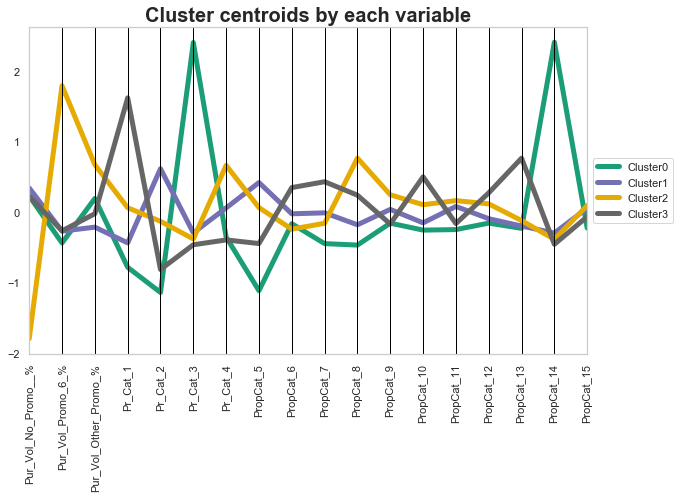

In [56]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0 represents those households who purchases under no promotions or other promotions. 

Cluster 1 characterizes no promotion purchasers from price category 2 and proposition category 5

Cluster 2 are one purchases mostly when there's 6% promotion, on price category 4 and proposition category 8.

Cluster 3 are those purchase moslty when no promotion, and price category 1. 

### For Basis of purchase and Purchase Behaviour

In [57]:
non_demographic_df.columns

Index(['Member_id', 'No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of__Trans', 'Value', 'Trans__Brand_Runs', 'VolTran', 'Avg_Price_',
       'Pur_Vol_No_Promo__%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%',
       'Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24',
       'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15', 'maxBrPurchase',
       'maxBrand', 'maxPrCatPurchase', 'maxPriceCat', 'maxPropPurchase',
       'maxPropCat'],
      dtype='object')

In [58]:
all_cols=basis_of_purchase+purchase_behaviour

In [59]:
all_df=non_demographic_df[all_cols]

In [60]:
all_df.head()

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,1.000,0.000,0.000,0.234,0.561,0.131,0.075,0.502,0.000,0.000,0.000,0.000,0.0,0.000,0.028,0.0,0.131,0.340,3,17,8025,24,818.0,1.41,334.38,10.19,0.377,0.492
1,0.887,0.097,0.016,0.293,0.547,0.095,0.064,0.456,0.347,0.027,0.016,0.014,0.0,0.059,0.000,0.0,0.081,0.000,5,25,13975,40,1681.5,1.60,349.38,12.03,0.145,0.699
2,0.942,0.019,0.039,0.120,0.318,0.562,0.000,0.245,0.121,0.034,0.011,0.009,0.0,0.000,0.016,0.0,0.562,0.003,5,37,23100,63,1950.0,1.70,366.67,8.44,0.545,0.379
3,1.000,0.000,0.000,0.000,0.400,0.600,0.000,0.400,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.600,0.000,2,4,1500,4,114.0,1.00,375.00,7.60,0.600,0.000
4,0.614,0.145,0.241,0.000,0.048,0.145,0.807,0.807,0.000,0.000,0.048,0.000,0.0,0.000,0.000,0.0,0.145,0.000,3,6,8300,13,591.0,2.17,638.46,7.12,0.145,0.807


In [61]:
scaler = StandardScaler()
all_df=pd.DataFrame(scaler.fit_transform(all_df), columns=all_df.columns);


### Identifyin optimal number of clusters

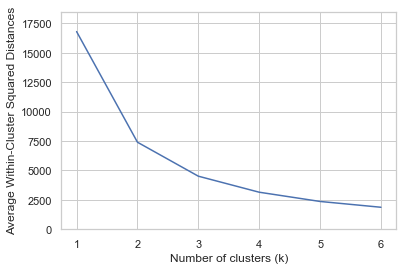

In [62]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters,
        random_state=0).fit(all_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

__Optimal Value of k = 4, adding more clusters doesn't improve cluster homogenity__

In [63]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans=kmeans.fit(all_df)

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=all_df.columns)
centroids

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,Pr_Cat_1,Pr_Cat_2,Pr_Cat_3,Pr_Cat_4,PropCat_5,PropCat_6,PropCat_7,PropCat_8,PropCat_9,PropCat_10,PropCat_11,PropCat_12,PropCat_13,PropCat_14,PropCat_15,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,0.174,-0.167,-0.073,1.672,-0.845,-0.479,-0.407,-0.352,0.277,0.317,0.243,-0.260,0.662,-0.205,0.404,0.813,-0.472,-0.124,-0.380,-0.274,-0.626,-0.385,-0.146,-0.162,-0.468,1.422,-0.417,0.493
1,0.241,-0.485,0.227,-0.798,-1.238,2.532,-0.358,-1.155,-0.251,-0.455,-0.479,-0.127,-0.256,-0.284,-0.171,-0.241,2.534,-0.253,-0.599,-0.813,0.092,-0.429,-0.556,1.078,0.528,-1.334,1.454,-1.281
2,-0.439,0.522,0.054,0.050,0.189,-0.271,-0.002,-0.154,0.245,0.087,0.194,0.414,-0.083,0.071,0.032,-0.083,-0.275,0.171,0.837,0.990,0.325,0.873,0.411,-0.275,-0.359,0.057,-0.556,0.380
3,0.209,-0.209,-0.077,-0.583,0.598,-0.295,0.295,0.627,-0.256,-0.085,-0.132,-0.182,-0.164,0.120,-0.164,-0.239,-0.295,-0.009,-0.335,-0.448,-0.003,-0.412,-0.106,-0.015,0.357,-0.316,0.224,-0.166


In [64]:
distances = kmeans.transform(all_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=basis_of_purchase_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (108 members): 3311.59 within cluster 
Cluster 1 (68 members): 895.36 within cluster 
Cluster 2 (191 members): 3593.43 within cluster 
Cluster 3 (233 members): 4790.43 within cluster 


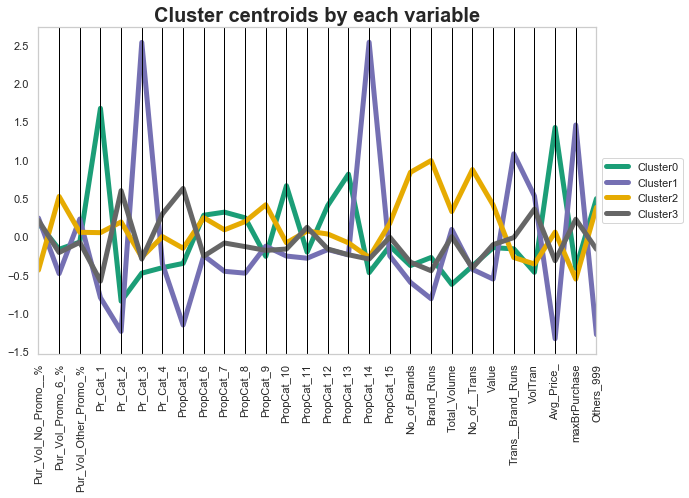

In [65]:
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

Cluster 0: Unloyal price unconsious customer, buy mostly from price category 1, and proposition 10 and 13. (Less volume but high avg price)

Cluster 1: Extremely loyal, buys with other promotion or no promotion, from price category 3 and proposition category 14. (High total brand run but low avg price) 

Cluster 2: Unloyal, buys with 6% promotion, high number of brands and transactions

Cluster 3: fairly loyal, price unconscious, buys from price category 2 and proposition categroy 5. High volume of transaction. 


__DEMOGRAPHICS INFORMATION BY CLUSTERS__

In [66]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()

In [67]:
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,1.769,1.676,6.889,1.491,3.148,4.213,3.083,3.528,0.769,18.259
1,3.426,2.044,7.691,1.529,3.044,2.265,3.897,3.559,0.868,7.912
2,2.372,2.246,9.016,1.927,3.340,4.639,4.770,3.021,1.031,21.178
3,2.674,2.060,8.232,1.760,3.189,3.996,4.318,3.176,0.944,15.695


Cluster 0=  High socio economic classm with fairly high affluence index. 

Cluster 1=  Lower socioeconomic class with low education level and lowest affluence index

Cluster 2=  Average socioeconomic class with large house, with highest affluency

Cluster 3=  Low socioeconomic class, with average education level, having large family 

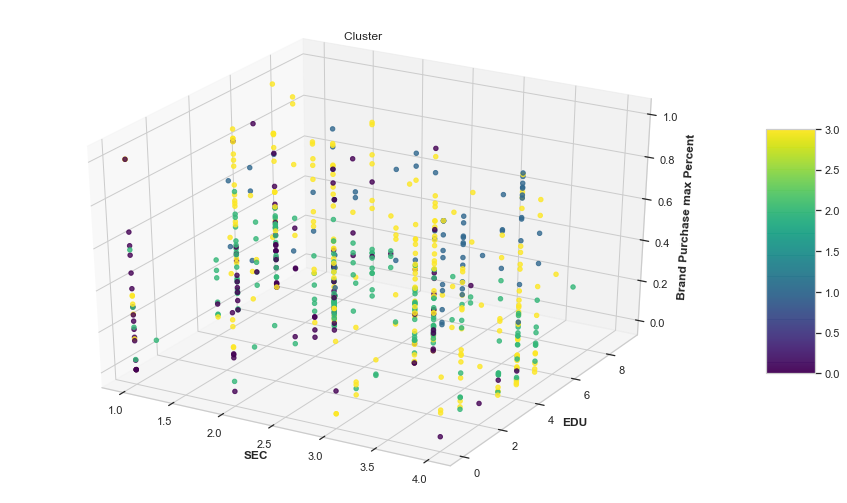

In [68]:

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 


# Creating color map
my_cmap = plt.get_cmap('viridis')
 
# Creating plot
sctt = ax.scatter3D(df['SEC'], df['EDU'], df['maxBrPurchase'],
                    alpha = 0.8,
                    c = df['clusters'].astype('category'),
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("Cluster ")
ax.set_xlabel('SEC', fontweight ='bold')
ax.set_ylabel('EDU', fontweight ='bold')
ax.set_zlabel('Brand Purchase max Percent', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

In [69]:
df.columns

Index(['Member_id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index', 'No_of_Brands', 'Brand_Runs', 'Total_Volume',
       'No_of__Trans', 'Value', 'Trans__Brand_Runs', 'VolTran', 'Avg_Price_',
       'Pur_Vol_No_Promo__%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%',
       'Br_Cd_57_144', 'Br_Cd_55', 'Br_Cd_272', 'Br_Cd_286', 'Br_Cd_24',
       'Br_Cd_481', 'Br_Cd_352', 'Br_Cd_5', 'Others_999', 'Pr_Cat_1',
       'Pr_Cat_2', 'Pr_Cat_3', 'Pr_Cat_4', 'PropCat_5', 'PropCat_6',
       'PropCat_7', 'PropCat_8', 'PropCat_9', 'PropCat_10', 'PropCat_11',
       'PropCat_12', 'PropCat_13', 'PropCat_14', 'PropCat_15', 'maxBrPurchase',
       'maxBrand', 'maxPrCatPurchase', 'maxPriceCat', 'maxPropPurchase',
       'maxPropCat', 'clusters'],
      dtype='object')

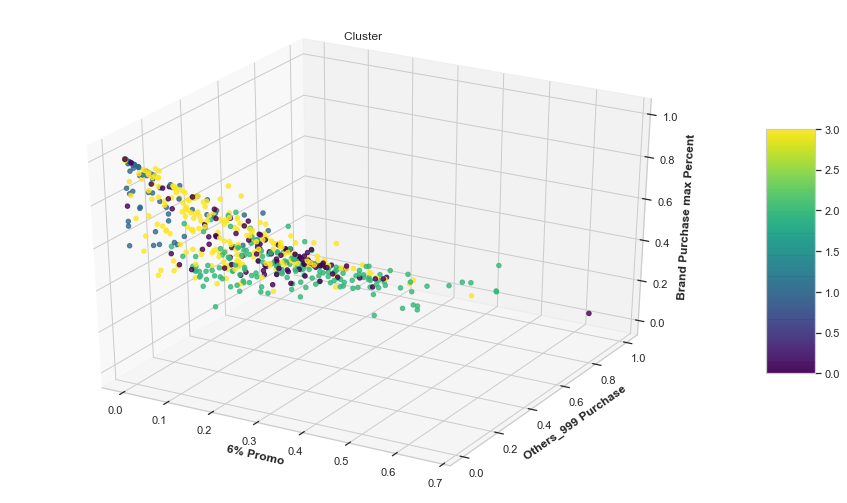

In [70]:

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 


# Creating color map
my_cmap = plt.get_cmap('viridis')
 
# Creating plot
sctt = ax.scatter3D(df['Pur_Vol_Promo_6_%'], df['Others_999'], df['maxBrPurchase'],
                    alpha = 0.8,
                    c = df['clusters'].astype('category'),
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("Cluster ")
ax.set_xlabel('6% Promo', fontweight ='bold')
ax.set_ylabel('Others_999 Purchase', fontweight ='bold')
ax.set_zlabel('Brand Purchase max Percent', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

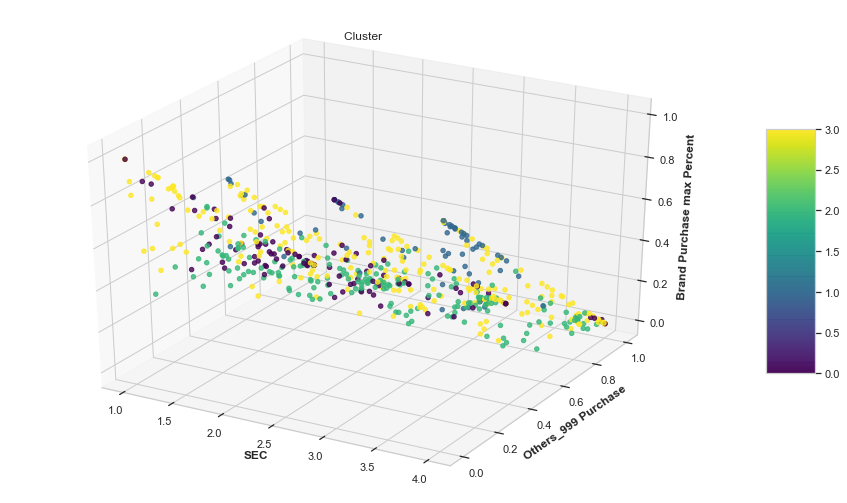

In [71]:

# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 


# Creating color map
my_cmap = plt.get_cmap('viridis')
 
# Creating plot
sctt = ax.scatter3D(df['SEC'], df['Others_999'], df['maxBrPurchase'],
                    alpha = 0.8,
                    c = df['clusters'].astype('category'),
                    cmap = my_cmap,
                    marker ='o')
 
plt.title("Cluster ")
ax.set_xlabel('SEC', fontweight ='bold')
ax.set_ylabel('Others_999 Purchase', fontweight ='bold')
ax.set_zlabel('Brand Purchase max Percent', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

__2- Develop a predictive model to classify clients as value conscious or not. Use a binary
logistic model. Use the segments/clusters to identify who is value conscious i.e., 1 vs. 0.The model will be used to mail these clients a promotion.Use data visualizations to present the business value of your final model.__

# With K=2 for basis of purchase and purchase behaviour variables

In [89]:
all_df=all_df[['Pur_Vol_No_Promo__%', 'Pur_Vol_Promo_6_%', 'Pur_Vol_Other_Promo_%', 'No_of_Brands', 'Brand_Runs', 'Total_Volume', 'No_of__Trans', 'Value',
       'Trans__Brand_Runs', 'VolTran', 'Avg_Price_', 'maxBrPurchase',
       'Others_999']]

In [93]:
kmeans = KMeans(n_clusters=2,random_state=1)
kmeans=kmeans.fit(all_df)


In [94]:

centroids = pd.DataFrame(kmeans.cluster_centers_,columns=all_df.columns)
centroids

,Pur_Vol_No_Promo__%,Pur_Vol_Promo_6_%,Pur_Vol_Other_Promo_%,No_of_Brands,Brand_Runs,Total_Volume,No_of__Trans,Value,Trans__Brand_Runs,VolTran,Avg_Price_,maxBrPurchase,Others_999
0,0.315,-0.397,-0.009,-0.529,-0.704,-0.143,-0.568,-0.308,0.308,0.349,-0.318,0.647,-0.536
1,-0.281,0.354,0.008,0.472,0.629,0.127,0.507,0.275,-0.275,-0.312,0.284,-0.578,0.479


Cluster 0 (283 members): 3269.07 within cluster 
Cluster 1 (317 members): 3194.33 within cluster 


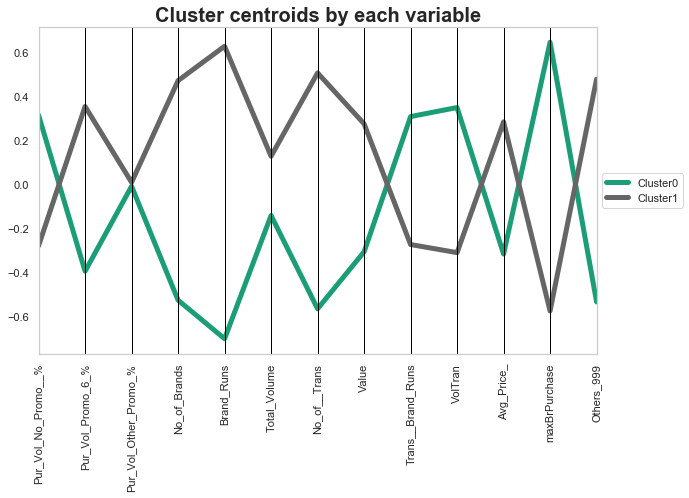

In [95]:
distances = kmeans.transform(all_df)
minSquaredDistances = distances.min(axis=1) ** 2
cluster_df = pd.DataFrame({'squaredDistance': minSquaredDistances,
'cluster': kmeans.labels_},
index=all_df.index)
for cluster, data in cluster_df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')
centroids['cluster'] = ['Cluster{}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
plt.title('Cluster centroids by each variable', fontsize = 20, 
          loc='center', fontdict=dict(weight='bold'))
parallel_coordinates(centroids, class_column='cluster',
colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(axis='x', rotation=90)

In [96]:
df['clusters']=kmeans.labels_
a=df[['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence_Index','clusters']].groupby('clusters').mean()
a

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
clusters,,,,,,,,,,
0,2.689,1.876,7.403,1.58,3.138,3.378,3.876,3.420,0.848,12.972
1,2.331,2.202,8.871,1.88,3.281,4.637,4.473,3.066,1.006,20.634


__Definition of success:__
1 (success= value conscious) = Clsuter 0 , which represents loyal customer purchasing without promotion, and less affluent.

0 ( failure)  = Cluster 1, representing unloyal



In [97]:
df['y']=kmeans.labels_
df['y'].value_counts()
df['y'].replace([0,1],[1,0], inplace= True)

In [98]:
from sklearn.linear_model import LogisticRegressionCV
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

In [99]:
demographics_df=df[demographics]

In [100]:
#demographics_df[['SEX','MT', 'FEH','CS']]=demographics_df[['SEX','MT', 'FEH','CS']].astype('category')

In [101]:
#demographics_df = pd.get_dummies(demographics_df, prefix_sep='_', drop_first=True)

In [102]:
demographics_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence_Index
0,4,3,10,1,4,4,2,4,1,2
1,3,2,10,2,2,4,4,2,1,19
2,2,3,10,2,4,5,6,4,1,23
3,4,0,0,0,4,0,0,5,0,0
4,4,1,10,2,3,4,4,3,1,10
...,...,...,...,...,...,...,...,...,...,...
595,2,3,10,2,4,5,5,4,1,15
596,3,3,10,2,3,5,4,4,1,29
597,3,3,17,2,4,4,9,4,1,13
598,2,1,4,2,4,5,2,4,2,20


In [103]:
# partition data
train_X, valid_X, train_y, valid_y = train_test_split(demographics_df, df['y'], test_size=0.4,random_state=1)
print('Training set:', train_X.shape)
print('Training Target: ', train_y.shape)
print('Validation set: ', valid_X.shape)
print('Validation Target: ', valid_y.shape)

Training set: (360, 10)
Training Target:  (360,)
Validation set:  (240, 10)
Validation Target:  (240,)


In [104]:
classes = ['Value conscious', 'Not value conscious']

In [105]:
logit_red = LogisticRegressionCV(penalty="l2", solver='liblinear', cv=5)
logit_red.fit(train_X, train_y)
print('intercept ', logit_red.intercept_[0])
print(pd.DataFrame({'coeff': logit_red.coef_[0]}, index=demographics_df.columns).transpose())
print("Training set confusion matrix: \n")
classificationSummary(train_y, logit_red.predict(train_X), class_names=classes)
print("\n")
print('AIC', AIC_score(valid_y, logit_red.predict(valid_X), df=len(train_X.columns) +
1))
print("Validation Set confusion matrix: \n")
# confusion matrix
classificationSummary(valid_y, logit_red.predict(valid_X), class_names=classes)

intercept  0.039270718757044056
         SEC    FEH     MT   SEX   AGE    EDU    HS  CHILD     CS  \
coeff  0.185 -0.151 -0.038  0.13 -0.02 -0.101  0.09  0.194  0.103   

       Affluence_Index  
coeff           -0.058  
Training set confusion matrix: 

Confusion Matrix (Accuracy 0.6972)

                    Prediction
             Actual     Value conscious Not value conscious
    Value conscious                 150                  43
Not value conscious                  66                 101


AIC 455.9734558938409
Validation Set confusion matrix: 

Confusion Matrix (Accuracy 0.6458)

                    Prediction
             Actual     Value conscious Not value conscious
    Value conscious                  92                  32
Not value conscious                  53                  63


In [106]:
logit_reg_pred = logit_red.predict_proba(valid_X)
full_result = pd.DataFrame({'actual': valid_y,
 'p(0)': [p[0] for p in logit_reg_pred],
 'p(1)': [p[1] for p in logit_reg_pred],
 'predicted': logit_red.predict(valid_X)})
full_result = full_result.sort_values(by=['p(1)'], ascending=False)


__Training Lift__

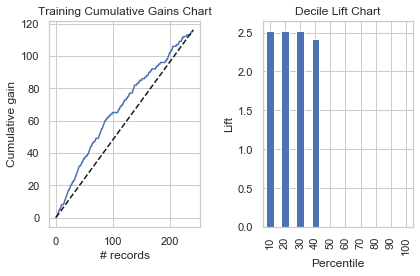

In [107]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(full_result.actual, ax=axes[0])
ax.set_ylabel('Cumulative gain')
ax.set_title('Training Cumulative Gains Chart')
ax = liftChart(full_result.predicted, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

__Validation Lift__

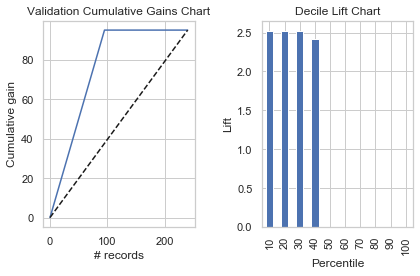

In [108]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(full_result.predicted, ax=axes[0])
ax.set_ylabel('Cumulative gain')
ax.set_title('Validation Cumulative Gains Chart')
ax = liftChart(full_result.predicted, ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')
plt.tight_layout()
plt.show()

Training and validation decile lift is fairly same.

The model suggested that if we select 40% of high propensity househoulds, this would have twice the chance of selection value conscious customers than naively selecting at random. So direct mailing these customers (which are brand loyal also) will be beneficial for CRISA